# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [187]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [9]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [198]:
# your answer here-1st way
# table = pd.pivot_table(df, values='D', index=['A', 'B'],
# ...                     columns=['C'], aggfunc=np.sum)

pd.pivot_table(employee, values='Salary',columns =['Department'],aggfunc=np.mean)

Department,HR,IT,Sales
Salary,45.0,48.75,55.0


In [11]:
# your answer here-2nd way
employee.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [15]:
# your answer here
pd.pivot_table(employee, values=['Salary'],index=['Title'],columns=['Department'],aggfunc=np.mean)

Salary            
Department     HR    IT Sales
Title                        
VP           70.0  70.0   NaN
analyst      32.5  32.5   NaN
associate     NaN  60.0  55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [207]:
# your answer here
pd.pivot_table(employee, values=['Salary'],index=['Department','Title'],columns=['Years'],aggfunc=np.mean)

Salary                              
Years                     1     2     3     4     7     8
Department Title                                         
HR         VP           NaN   NaN   NaN   NaN   NaN  70.0
           analyst      NaN  30.0   NaN  35.0   NaN   NaN
IT         VP           NaN   NaN   NaN   NaN   NaN  70.0
           analyst     35.0  30.0   NaN   NaN   NaN   NaN
           associate    NaN   NaN   NaN   NaN  60.0   NaN
Sales      associate    NaN  55.0  55.0   NaN   NaN   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [204]:
# your answer here
pd.pivot_table(employee, values=['Name','Salary'],index=['Title']
               ,columns=['Department'],aggfunc={ 'Name':'count',
                                                'Salary':np.mean})

Name            Salary            
Department   HR   IT Sales     HR    IT Sales
Title                                        
VP          1.0  1.0   NaN   70.0  70.0   NaN
analyst     2.0  2.0   NaN   32.5  32.5   NaN
associate   NaN  1.0   2.0    NaN  60.0  55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [36]:
# your answer here
pd.pivot_table(employee, values=['Salary'],index=['Title']
               ,columns=['Department'],aggfunc=[np.median,min,max,np.std])

/Users/ivyip/miniconda3/envs/ironhack/lib/python3.7/site-packages/pandas/core/reshape/pivot.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


median                min                max                   std  \
           Salary             Salary             Salary                Salary   
Department     HR    IT Sales     HR    IT Sales     HR    IT Sales        HR   
VP           70.0  70.0   NaN   70.0  70.0   NaN   70.0  70.0   NaN       NaN   
analyst      32.5  32.5   NaN   30.0  30.0   NaN   35.0  35.0   NaN  3.535534   
associate     NaN  60.0  55.0    NaN  60.0  55.0    NaN  60.0  55.0       NaN   

                            
                            
Department        IT Sales  
VP               NaN   NaN  
analyst     3.535534   NaN  
associate        NaN   0.0

#### Based on your comments, fill the missing values with an appropriate value

In [168]:
# your answer here
# There is no difference on Salary of each job position among departments

pivot = pd.pivot_table(employee, values=['Salary'],index=['Title']
               ,columns=['Department'],aggfunc=[np.median,min,max,np.std])

stats=['median','min','max','std']
rows =['VP','analyst','associate']
columns = ['HR','IT','Sales']

for s in stats:
    for r in rows:
        for c in columns:
            if pd.isnull(pivot.at[r,(s,'Salary',c)]):
                pivot.at[r,(s,'Salary',c)]=pivot.at[r,(s,'Salary','IT')]

In [170]:
rows =['VP','analyst','associate']
columns = ['HR','IT','Sales']

for r in rows:
    for c in columns:
        if pd.isnull(pivot.at[r,('std','Salary',c)]):
            pivot.at[r,(s,'Salary',c)]=0

In [171]:
pivot

median                min                max                   std  \
           Salary             Salary             Salary                Salary   
Department     HR    IT Sales     HR    IT Sales     HR    IT Sales        HR   
VP           70.0  70.0  70.0   70.0  70.0  70.0   70.0  70.0  70.0  0.000000   
analyst      32.5  32.5  32.5   30.0  30.0  30.0   35.0  35.0  35.0  3.535534   
associate    60.0  60.0  55.0   60.0  60.0  55.0   60.0  60.0  55.0  0.000000   

                                
                                
Department        IT     Sales  
VP          0.000000  0.000000  
analyst     3.535534  3.535534  
associate   0.000000  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [181]:
# your answer here
pd.pivot_table(employee, values=['Title','Salary']
               ,columns=['Department'],aggfunc={ 'Title':np.size,
                                                'Salary':np.sum})

Department,HR,IT,Sales
Salary,135,195,110
Title,3,4,2


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [172]:
# your answer here
pd.pivot_table(employee, values=['Years','Salary'],index=['Title'],
               columns=['Department'],aggfunc={ 'Years':np.sum,
                                                'Salary':np.mean})

Salary             Years           
Department     HR    IT Sales    HR   IT Sales
Title                                         
VP           70.0  70.0   NaN   8.0  8.0   NaN
analyst      32.5  32.5   NaN   6.0  3.0   NaN
associate     NaN  60.0  55.0   NaN  7.0   5.0

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [96]:
# your answer here--Your custom function here

def mean_salary_without_max(department):
    emp_c=employee.copy()
    emp_c=emp_c.drop(emp_c[(emp_c['Department']==department) & 
                    (emp_c['Salary']==pd.pivot_table(emp_c, values=['Salary'],
                                    columns=['Department'],aggfunc=max)[department][0])].index)
    return pd.pivot_table(emp_c,values=['Salary'],columns=['Department'],aggfunc=np.mean)
    
    

In [208]:
mean_salary_without_max('IT')

Department,HR,IT,Sales
Salary,45.0,41.666667,55.0


In [89]:
# For comparison
pd.pivot_table(employee,values=['Salary'],columns=['Department'],aggfunc=np.mean)

Department,HR,IT,Sales
Salary,45.0,48.75,55.0


In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [99]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [100]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [101]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [105]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

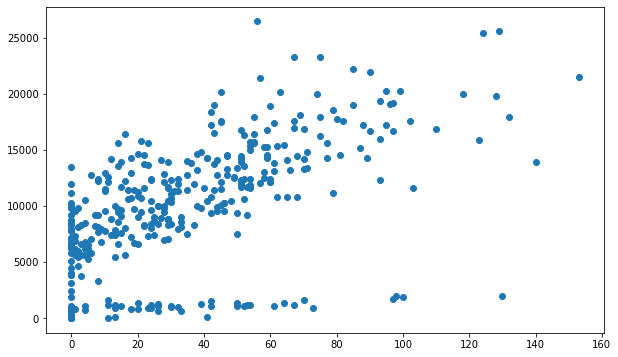

In [109]:
# your answer here

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps']);

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here
# Minute Very Active is postively correlated with Steps

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [110]:
# your answer here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

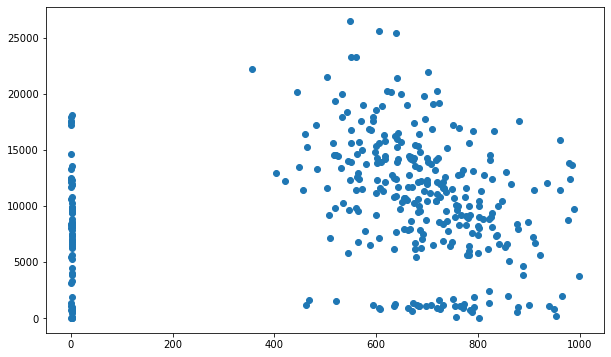

In [111]:
# your answer here

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps']);

In [22]:
# Your comment here
# The two variables are not correlated 

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [112]:
# your answer here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

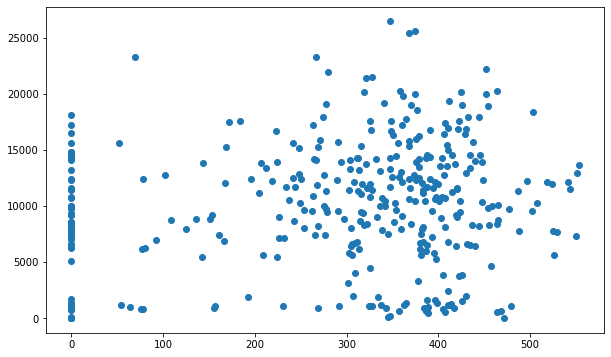

In [113]:
# your answer here
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps']);

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [123]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column].corr(method ='pearson')

In [191]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


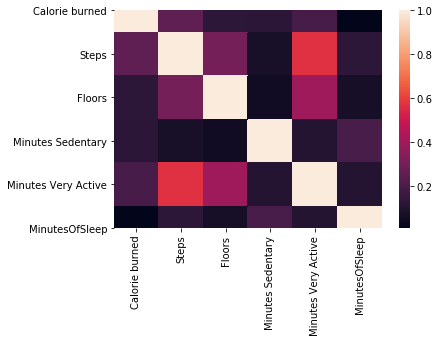

In [192]:
sns.heatmap(cor_fit);

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [125]:
# your answer here
cor_fit['Steps'].sort_values

<bound method Series.sort_values of Calorie burned         0.255305
Steps                  1.000000
Floors                 0.306511
Minutes Sedentary      0.076906
Minutes Very Active    0.571452
MinutesOfSleep         0.130986
Name: Steps, dtype: float64>

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [126]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [127]:
#Print time_grades
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

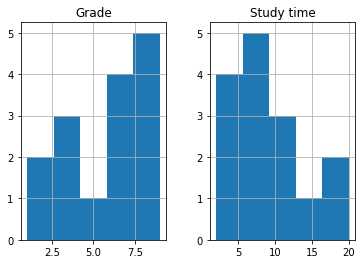

In [131]:
# your answer here
time_grades.hist(bins=5);

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [134]:
# your answer here-Pearson 
time_grades['Study time'].corr(time_grades['Grade'],method='pearson')

0.7980456073578858

In [136]:
## your answer here-Spearman
time_grades['Study time'].corr(time_grades['Grade'],method='spearman')

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

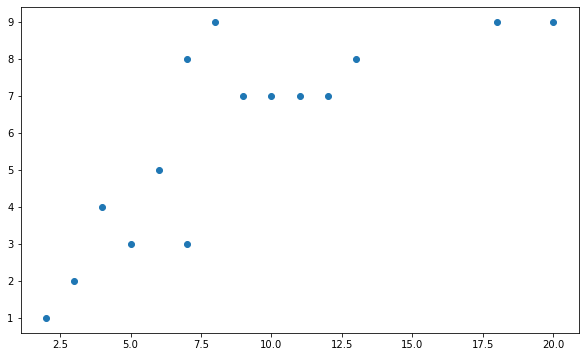

In [194]:
# your answer here
fig,ax = plt.subplots(figsize=(10,6)) 
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade']);


In [34]:
#your comment here
um.....

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here
NO.....